In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("credit-approval_csv.csv")

In [3]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved



# Statistics value----

In [4]:
data.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


# Information of data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           678 non-null    object 
 1   Age              678 non-null    float64
 2   Debt             690 non-null    float64
 3   Married          684 non-null    object 
 4   BankCustomer     684 non-null    object 
 5   EducationLevel   681 non-null    object 
 6   Ethnicity        681 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          677 non-null    float64
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
 16  Approved_Status  690 non-null    object 
dtypes: float64(4), i

# Numerical and categorical value----

In [6]:
cat = []
num = []
for column in data.columns:
    if data[column].dtype == 'object':
        cat.append(column)
    else:
        num.append(column)
        
print("Categorical==",cat,"\n","Numerical==",num)

Categorical== ['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'Approved', 'Approved_Status'] 
 Numerical== ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']


# Checking missing value ---

In [7]:
data.isnull().sum()

Gender             12
Age                12
Debt                0
Married             6
BankCustomer        6
EducationLevel      9
Ethnicity           9
YearsEmployed       0
PriorDefault        0
Employed            0
CreditScore         0
DriversLicense      0
Citizen             0
ZipCode            13
Income              0
Approved            0
Approved_Status     0
dtype: int64

<AxesSubplot:>

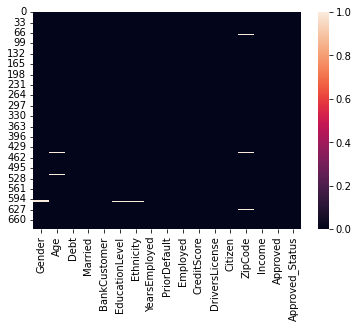

In [8]:
#Visualising of issing value----
sns.heatmap(data.isnull())

# Hindling of Missing value---

In [9]:
for column in data.columns:
    if data[column].dtype=='object':
        data[column].fillna(data[column].mode()[0],inplace=True)
    else:
        data[column].fillna(data[column].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    object 
 1   Age              690 non-null    float64
 2   Debt             690 non-null    float64
 3   Married          690 non-null    object 
 4   BankCustomer     690 non-null    object 
 5   EducationLevel   690 non-null    object 
 6   Ethnicity        690 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          690 non-null    float64
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
 16  Approved_Status  690 non-null    object 
dtypes: float64(4), i

# Detecting Outliyer

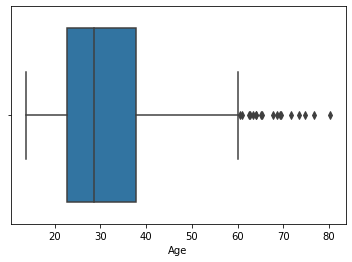

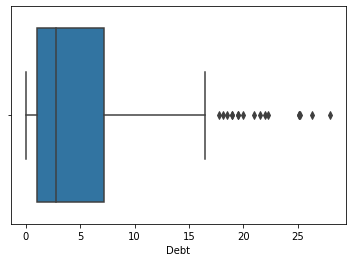

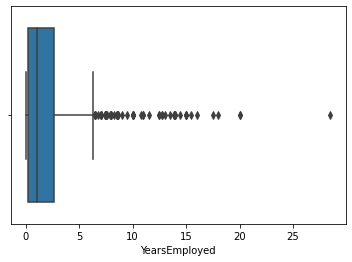

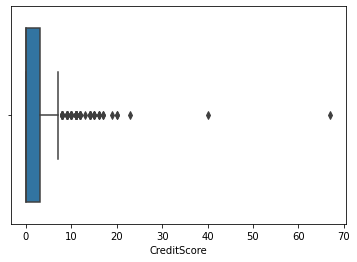

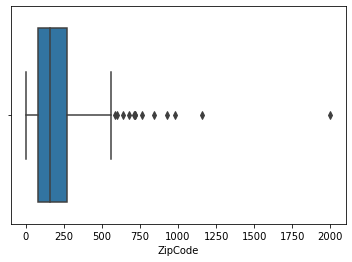

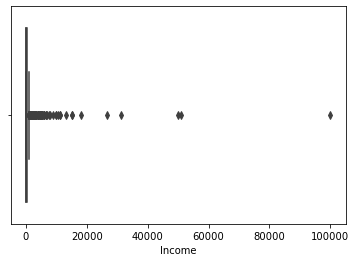

In [10]:

for col in data.columns:
    if data[col].dtype != 'object':
        sns.boxplot(data[col])
        plt.show()

# Detecting Skewness

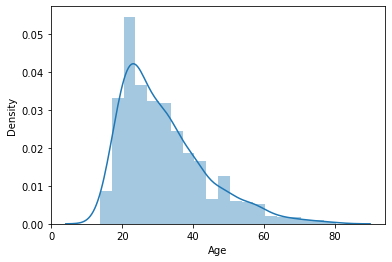

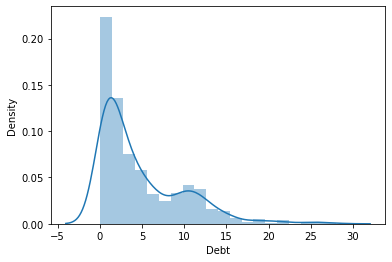

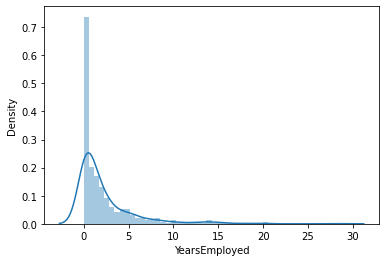

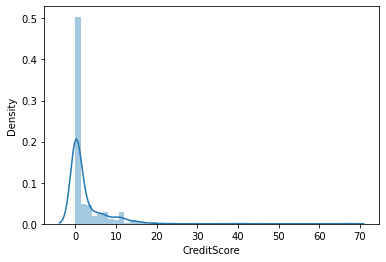

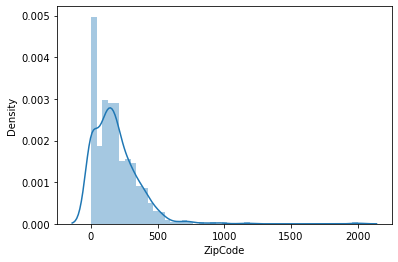

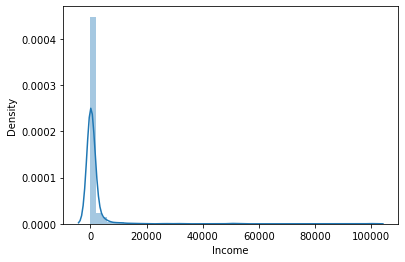

In [11]:

for col in data.columns:
    if data[col].dtype != 'object':
        sns.distplot(data[col])
        plt.show()

# Reoving skewness

In [12]:
num

['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']

In [13]:
data['Age'] = np.log(data['Age'])
data['Debt'] = np.sqrt(data['Debt'])
data['YearsEmployed'] = np.sqrt(data['YearsEmployed'])
data['CreditScore'] = np.sqrt(data['CreditScore'])
data['Income'] = np.sqrt(data['Income'])


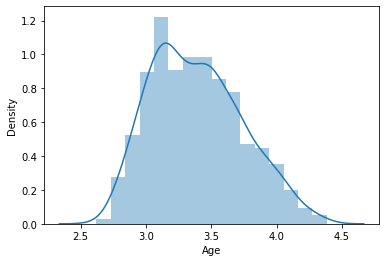

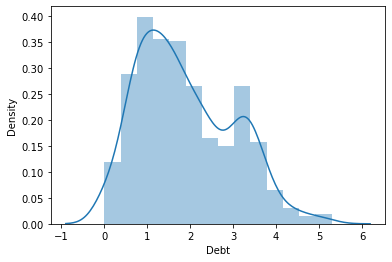

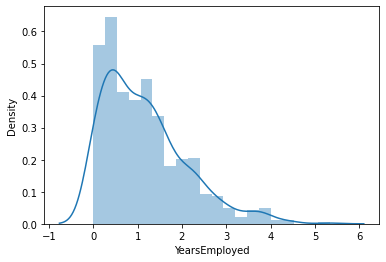

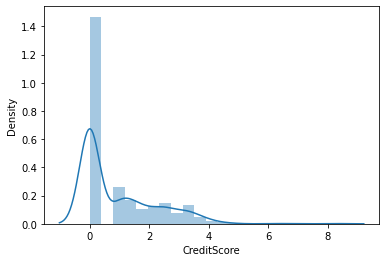

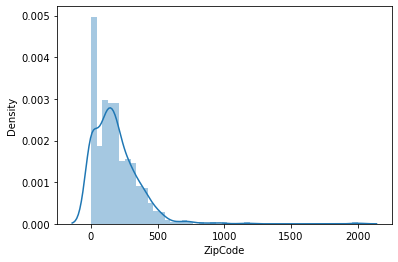

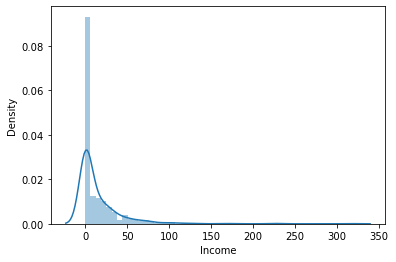

In [14]:

for col in data.columns:
    if data[col].dtype != 'object':
        sns.distplot(data[col])
        plt.show()

<AxesSubplot:xlabel='YearsEmployed', ylabel='Density'>

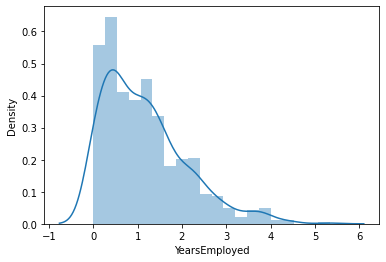

In [15]:

sns.distplot(data['YearsEmployed'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

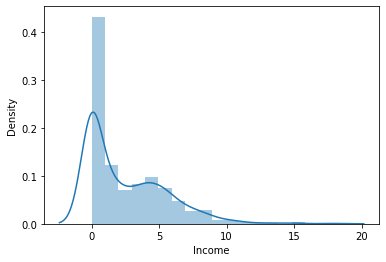

In [16]:
data['Income'] = np.sqrt(data['Income'])
sns.distplot(data['Income'])

# UniVarient,Bivarient,MultiVarient

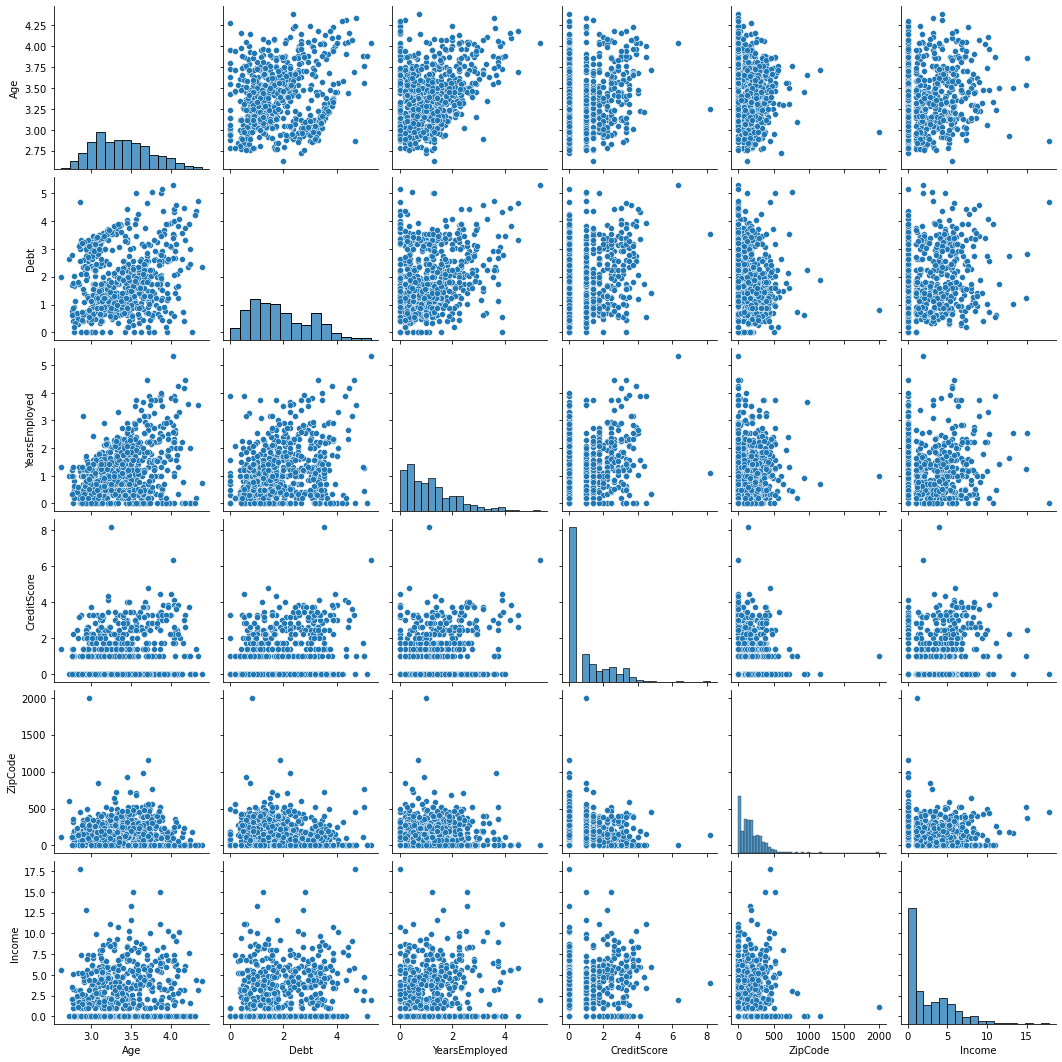

In [17]:
sns.pairplot(data)

# Drop Unnecessary Feature

In [18]:
data.drop(['ZipCode','Approved',"Citizen",],axis=1,inplace=True)

In [19]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved_Status
0,b,3.428488,0.000000,u,g,w,v,1.118034,t,t,1.000000,f,0.000000,Approved
1,a,4.071929,2.111871,u,g,q,h,1.743560,t,t,2.449490,f,4.864599,Approved
2,a,3.198673,0.707107,u,g,q,h,1.224745,t,f,0.000000,f,5.357742,Approved
3,b,3.326115,1.240967,u,g,w,v,1.936492,t,t,2.236068,t,1.316074,Approved
4,b,3.004196,2.371708,u,g,w,v,1.307670,t,f,0.000000,f,0.000000,Approved


# Pre-Processing of data
## Convert Catogerical into Numerical Value----

In [20]:
cat

['Gender',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'DriversLicense',
 'Citizen',
 'Approved',
 'Approved_Status']

In [21]:
import sklearn
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le=LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for column in data.columns.values:
    # Compare if the dtype is object
    if data[column].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        data[column]=le.fit_transform(data[column])

# Corelation

<AxesSubplot:>

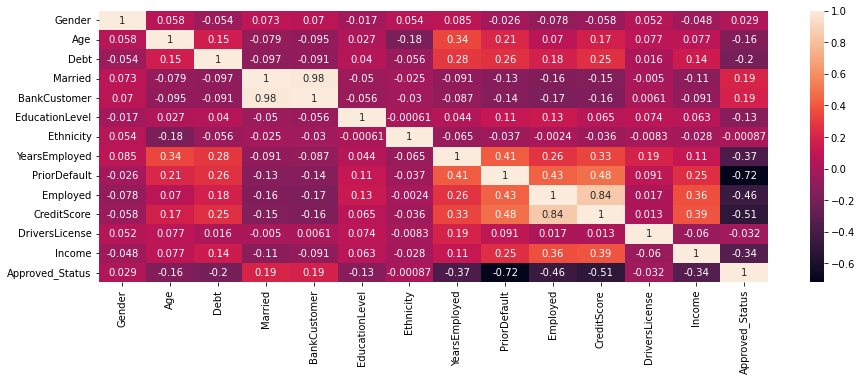

In [22]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
print(vif_data)

            feature         VIF
0            Gender    3.399741
1               Age   78.353711
2              Debt    4.452721
3           Married  141.881721
4      BankCustomer   21.735830
5    EducationLevel    2.886686
6         Ethnicity    5.117838
7     YearsEmployed    3.646241
8      PriorDefault    4.912601
9          Employed    6.290106
10      CreditScore    6.018700
11   DriversLicense    1.951874
12           Income    2.128347
13  Approved_Status    5.413179


In [24]:
data.drop(['Age','Married',"BankCustomer",],axis=1,inplace=True)

In [25]:
data.head()

,Gender,Debt,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved_Status
0,1,0.000000,12,7,1.118034,1,1,1.000000,0,0.000000,0
1,0,2.111871,10,3,1.743560,1,1,2.449490,0,4.864599,0
2,0,0.707107,10,3,1.224745,1,0,0.000000,0,5.357742,0
3,1,1.240967,12,7,1.936492,1,1,2.236068,1,1.316074,0
4,1,2.371708,12,7,1.307670,1,0,0.000000,0,0.000000,0


# Divide the target features and Independent Feature

In [26]:
x = data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x

array([[ 1.        ,  0.        , 12.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  2.11187121, 10.        , ...,  2.44948974,
         0.        ,  4.86459856],
       [ 0.        ,  0.70710678, 10.        , ...,  0.        ,
         0.        ,  5.35774208],
       ...,
       [ 0.        ,  3.67423461,  5.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.45276926,  0.        , ...,  0.        ,
         0.        ,  5.2331757 ],
       [ 1.        ,  1.83711731,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

# Splitting the data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=42)

# Scaling The Features

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scalar = MinMaxScaler(feature_range=(0,1))
x_train=scalar.fit_transform(x_train)
x_test =scalar.fit_transform(x_test)

# Model Selection

### Logistic regression

In [31]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(random_state=100)

# Fit logreg to the train set
logreg.fit(x_train,y_train
          
          )

LogisticRegression(random_state=100)

In [32]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(x_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(x_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.855072463768116
[[29  4]
 [ 6 30]]


### SVM

In [33]:
from sklearn.svm import SVC
s_vector = SVC()
s_vector.fit(x_train,y_train)




# Use logreg to predict instances from the test set and store it
y_pred_s = s_vector.predict(x_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of support vector classifier: ", s_vector.score(x_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred_s))

Accuracy of support vector classifier:  0.8115942028985508
[[26  7]
 [ 6 30]]


### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier


dicision_tree=DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,min_samples_split=19, random_state=0, splitter='random')    
dicision_tree.fit(x_train,y_train)


# Use logreg to predict instances from the test set and store it
y_pred_dr = dicision_tree.predict(x_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of Decision Tree classifier: ", dicision_tree.score(x_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred_dr))

Accuracy of Decision Tree classifier:  0.8115942028985508
[[25  8]
 [ 5 31]]


In [35]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
pram = {'criterion':['entropy', 'gini'],
    'splitter':['best','random'],
    'max_depth':range(1,11),
    'min_samples_split':range(2,20),
    'min_samples_leaf':range(2,20)}

tree_clas = DecisionTreeClassifier(random_state=102)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=pram, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=102),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 11),
                         'min_samples_leaf': range(2, 20),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [36]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=19, random_state=102,
                       splitter='random')

In [37]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 19,
 'min_samples_split': 2,
 'splitter': 'random'}

In [38]:
from sklearn.tree import DecisionTreeClassifier


dicision_tree=DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=3,min_samples_split=13, random_state=102, splitter='random')    
dicision_tree.fit(x_train,y_train)


# Use logreg to predict instances from the test set and store it
y_pred_dr = dicision_tree.predict(x_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of Decision Tree classifier: ", dicision_tree.score(x_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred_dr))

Accuracy of Decision Tree classifier:  0.8405797101449275
[[29  4]
 [ 7 29]]


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(random_state=43)   
rfc.fit(x_train,y_train)


# Use logreg to predict instances from the test set and store it
y_pred_rfc = rfc.predict(x_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of Decision Tree classifier: ", rfc.score(x_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred_rfc))

Accuracy of Decision Tree classifier:  0.7971014492753623
[[26  7]
 [ 7 29]]


In [40]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
pram = {'n_estimators':[200, 400, 600, 800],
    #'criterion':['entropy', 'gini'],
    'max_features': ['auto', 'sqrt'],
    'max_depth':[10, 20, 30, 40, 50],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]}

random = RandomForestClassifier(random_state=43)
grid_search = GridSearchCV(estimator=random, param_grid=pram, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=43),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800]})

In [41]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_split=5,
                       n_estimators=400, random_state=43)

In [42]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [45]:
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(n_estimators=400,max_depth=10,max_features='auto',min_samples_leaf=1,min_samples_split=5,random_state=43)   
rfc.fit(x_train,y_train)


# Use logreg to predict instances from the test set and store it
y_pred_rfc = rfc.predict(x_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of Decision Tree classifier: ", rfc.score(x_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred_rfc))

Accuracy of Decision Tree classifier:  0.8260869565217391
[[26  7]
 [ 5 31]]


In [44]:
from xgboost import XGBRFClassifier


xgboost=XGBRFClassifier()   
xgboost.fit(x_train,y_train)


# Use logreg to predict instances from the test set and store it
y_pred_xg = xgboost.predict(x_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of Decision Tree classifier: ", xgboost.score(x_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred_xg))

Accuracy of Decision Tree classifier:  0.8405797101449275
[[27  6]
 [ 5 31]]
